<a href="https://colab.research.google.com/github/SalarShafiee/ML-Projects/blob/main/thesis%2021.02.2025%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import gc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
import kagglehub

path = kagglehub.dataset_download("zygmuntyt/nutrition5k-dataset-side-angle-images")

print("Path to dataset files:", path)

100%|██████████| 5.97G/5.97G [05:28<00:00, 19.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2


In [3]:
!pip install openpyxl

In [4]:
import pandas as pd
df=pd.read_excel('/content/sample_data/dish_metadata_cafe1 .xlsx')
df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40


In [5]:
import pandas as pd
import os
from glob import glob

# Assuming df is already loaded
df['path_to_images'] = ''

base_path = "/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2"

for index, row in df.iterrows():
    dish_id = row['dish_id']
    image_folder = os.path.join(base_path, dish_id, "frames_sampled30")

    if os.path.exists(image_folder):
        # Collect all image paths within the folder
        image_paths = glob(os.path.join(image_folder, "*.jpeg"))
        if image_paths:
            df.at[index, 'path_to_images'] = image_paths  # Store list of paths
        else:
            print(f"Warning: No images found for dish_id: {dish_id}")
            df.at[index, 'path_to_images'] = []
    else:
        print(f"Warning: Folder not found for dish_id: {dish_id}")
        df.at[index, 'path_to_images'] = []

df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [6]:


import pandas as pd

df.loc[df['path_to_images'].apply(lambda x: x == [] or x == ['image not found']), 'path_to_images'] = pd.NA

df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988000,0.000000,25.730000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152000,6.840000,1.520000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100000,17.000000,2.000000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350000,0.000000,12.740000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000000,0.800000,0.400000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
...,...,...,...,...,...,...,...
4763,dish_1568666230,55.800003,268.0,0.692000,10.969999,4.532000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4764,dish_1568666263,93.400002,348.0,0.852000,19.770000,7.172000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4765,dish_1568666303,443.199982,560.0,8.483999,19.770000,72.892006,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4766,dish_1568666329,743.760010,594.0,42.484001,19.770000,72.891998,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [7]:
df = df.dropna()
df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988000,0.000000,25.730000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152000,6.840000,1.520000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100000,17.000000,2.000000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350000,0.000000,12.740000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000000,0.800000,0.400000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
...,...,...,...,...,...,...,...
4763,dish_1568666230,55.800003,268.0,0.692000,10.969999,4.532000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4764,dish_1568666263,93.400002,348.0,0.852000,19.770000,7.172000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4765,dish_1568666303,443.199982,560.0,8.483999,19.770000,72.892006,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4766,dish_1568666329,743.760010,594.0,42.484001,19.770000,72.891998,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [8]:
df.shape

(4606, 7)

In [8]:
import pandas as pd
import ast
import tensorflow as tf


def get_first_image(path_list):

    if isinstance(path_list, list) and path_list:
        return path_list[0]
    else:
        return None


df['first_image'] = df['path_to_images'].apply(get_first_image)


print(df[['first_image', 'total_carb']].head())

                                         first_image  total_carb
0  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.00
1  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        6.84
2  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...       17.00
3  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.00
4  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.80


<ipython-input-8-18342ab07f0b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_image'] = df['path_to_images'].apply(get_first_image)


In [22]:
import pandas as pd
import ast
import tensorflow as tf
from sklearn.model_selection import train_test_split



train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)


print(f"Train samples: {len(train_df)}, Val samples: {len(val_df)}, Test samples: {len(test_df)}")



IMG_SIZE = 224
BATCH_SIZE = 32


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

def load_and_preprocess_image(image_path, target, augment=False):

    image = tf.io.read_file(image_path)

    image = tf.image.decode_jpeg(image, channels=3)

    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

    image = image / 255.0

    if augment:
        image = data_augmentation(image)

    return image, tf.cast(target, tf.float32)

def create_dataset(df, augment=False, shuffle=False):
    paths = df['first_image'].values
    targets = df['total_carb'].values
    dataset = tf.data.Dataset.from_tensor_slices((paths, targets))

    dataset = dataset.map(lambda path, target: load_and_preprocess_image(path, target, augment=augment),
                          num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = create_dataset(train_df, augment=True, shuffle=True).cache().prefetch(tf.data.AUTOTUNE)
val_ds = create_dataset(val_df, augment=False, shuffle=False).cache().prefetch(tf.data.AUTOTUNE)
test_ds = create_dataset(test_df, augment=False, shuffle=False).cache().prefetch(tf.data.AUTOTUNE)


Train samples: 3224, Val samples: 691, Test samples: 691


In [1]:
! pip install vit-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00


In [2]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [3]:
! pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [17]:
import numpy as np
import pandas as pd
import os
import gc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [23]:
# Model definition
from tensorflow import keras
from vit_keras import vit
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


IMG_SIZE = 224
BATCH_SIZE = 32

vit_model = vit.vit_b16(
    image_size=IMG_SIZE,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = vit_model(inputs)

/usr/local/lib/python3.11/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [24]:
# Add more layers and regularization
x = layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [14]:
# Fine-tuning
#for layer in vit_model.layers[-10:]:  # Adjust the number of layers to fine-tune
    #layer.trainable = True


In [25]:
# Compile with adjusted hyperparameters and callbacks
optimizer = Adam(learning_rate=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [26]:
# prompt: now I want to see the shape of each mini batch

for batch in train_ds:
  print(batch[0].shape)
  break # Print only the shape of the first batch
for batch in val_ds:
  print(batch[0].shape)
  break # Print only the shape of the first batch
for batch in test_ds:
  print(batch[0].shape)
  break # Print only the shape of the first batch


(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)


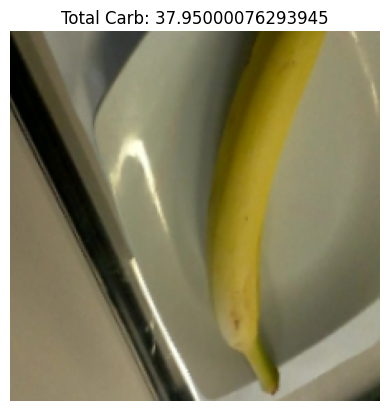

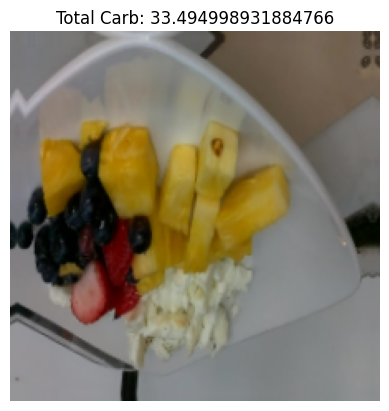

In [27]:
# prompt: now I want to print just a photo from train data set with its target value which is total carb

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'train_ds' is your training dataset

for images, targets in train_ds.take(2):  # Take one batch from the dataset
  for i in range(min(BATCH_SIZE, len(images))):  # Iterate through images in the batch
    image = images[i].numpy()
    target = targets[i].numpy()

    # Display the image
    plt.imshow(image)
    plt.title(f"Total Carb: {target}")
    plt.axis('off')
    plt.show()

    # If you want to display only one image per batch
    break # Remove this line to see all images from the first batch


In [ ]:
# Training
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 865.5856 - mae: 10.8565

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/101 [==============================] - 785s 7s/step - loss: 865.5856 - mae: 10.8565 - val_loss: 856.3817 - val_mae: 8.8023 - lr: 1.0000e-04
Epoch 2/50
101/101 [==============================] - 743s 7s/step - loss: 779.0159 - mae: 8.7903 - val_loss: 857.0505 - val_mae: 7.7100 - lr: 1.0000e-04
Epoch 3/50
101/101 [==============================] - 746s 7s/step - loss: 746.1729 - mae: 8.3233 - val_loss: 811.4194 - val_mae: 10.1859 - lr: 1.0000e-04
Epoch 4/50
101/101 [==============================] - 742s 7s/step - loss: 677.7735 - mae: 6.8332 - val_loss: 839.7216 - val_mae: 10.4209 - lr: 1.0000e-04
Epoch 5/50
101/101 [==============================] - 741s 7s/step - loss: 638.9717 - mae: 6.1512 - val_loss: 816.5134 - val_mae: 7.9117 - lr: 1.0000e-04
Epoch 6/50
101/101 [==============================] - 741s 7s/step - loss: 620.3076 - mae: 6.5107 - val_loss: 864.6252 - val_mae: 7.8090 - lr: 1.0000e-04
Epoch 7/50
101/101 [==============================] - 743s 7s/step - loss: 582.3420 

In [19]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


NameError: name 'history' is not defined

In [28]:
import numpy as np

results = model.evaluate(test_ds)


print("Test Loss:", results[0])
print("Test MAE:", results[1])



predictions = model.predict(test_ds)

true_values = test_df['total_carb'].values

# Filter out rows with zero true values before calculating MAPE
nonzero_indices = np.where(true_values != 0)[0]
filtered_true_values = true_values[nonzero_indices]
filtered_predictions = predictions.flatten()[nonzero_indices]

# Calculate MAPE on filtered data
mape = np.mean(np.abs((filtered_true_values - filtered_predictions) / filtered_true_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE) on the test dataset (excluding zeros): {mape:.2f}%")


22/22 [==============================] - 45s 2s/step - loss: 407.0263 - mae: 5.9692
Test Loss: 407.0262756347656
Test MAE: 5.969244480133057
22/22 [==============================] - 46s 2s/step
Mean Absolute Percentage Error (MAPE) on the test dataset (excluding zeros): 71.81%


In [33]:
import tensorflow as tf
import numpy as np
# ... (rest of your imports and model loading) ...

# Load the saved model
model = keras.models.load_model('best_model.h5')  # Load the saved model

def calculate_insulin_dose(carbs, current_bg, target_bg, insulin_to_carb_ratio, correction_factor):


    # Step 1: Calculate Bolus Insulin for Carbohydrates
    bolus_insulin = carbs / insulin_to_carb_ratio

    # Step 2: Calculate Correction Insulin for Blood Glucose
    correction_insulin = (current_bg - target_bg) / correction_factor

    # Step 3: Calculate Total Insulin Dose
    total_insulin = bolus_insulin + correction_insulin

    # Ensure the insulin dose is not negative
    total_insulin = max(total_insulin, 0)

    return total_insulin

# Function to load and preprocess user's image
def preprocess_user_image(image_path):
    IMG_SIZE = 224  # Make sure this matches your training image size
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0  # Normalize
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image


# Get image path from the user
image_path = input("Enter the path to your food image: ")

# Preprocess the image
user_image = preprocess_user_image(image_path)

# Predict carbohydrate content
predicted_carbs = model.predict(user_image)[0][0]  # Get the prediction value

print(f"Predicted Carbohydrate Content: {predicted_carbs:.2f} grams")

# Get other inputs from the user
current_bg = float(input("Enter current blood glucose (mg/dL): "))
target_bg = float(input("Enter target blood glucose (mg/dL): "))
insulin_to_carb_ratio = float(input("Enter insulin-to-carb ratio (grams/unit): "))
correction_factor = float(input("Enter correction factor (mg/dL per unit): "))

# Calculate and print insulin dose
insulin_dose = calculate_insulin_dose(predicted_carbs, current_bg, target_bg, insulin_to_carb_ratio, correction_factor)
print(f"\nTotal Insulin Dose Needed: {insulin_dose:.2f} units")

Enter the path to your food image: /content/images.jpeg
1/1 [==============================] - 3s 3s/step
Predicted Carbohydrate Content: 28.28 grams
Enter current blood glucose (mg/dL): 213
Enter target blood glucose (mg/dL): 100
Enter insulin-to-carb ratio (grams/unit): 8
Enter correction factor (mg/dL per unit): 5

Total Insulin Dose Needed: 26.14 units
